## Example using IRIS dataset

In [16]:

import pandas as pd

from scivae import VAE, Validate
from sciviso import Scatterplot

# Set the location of the data
config = {'scale': False, # Whether to min max scale your data VAEs work best when data is pre-normalised & outliers removed for trainiing
           'batch_norm': True, 
          'loss': {'loss_type': 'mse', # mean squared error
           'distance_metric': 'mmd', # Maximum mean discrepency (can use kl but it works worse)
            'mmd_weight': 1}, 
          'encoding': {'layers': [{'num_nodes': 512, 'activation_fn': 'selu'}, # First layer of encoding
                                  {'num_nodes': 264, 'activation_fn': 'selu'}]}, # Second layer of encoding
          'decoding': {'layers': [{'num_nodes': 264, 'activation_fn': 'selu'},  # First layer of decoding
                                  {'num_nodes': 512, 'activation_fn': 'selu'}]}, # Second layer of decoding 
 'latent': {'num_nodes': 128}, 'optimiser': {'params': {}, 'name': 'adagrad'}} # Empty params means use default

# Path to the data
protein_df = pd.read_csv('/disk1/ariane/vscode/llms/data/uniprot/one_active_encoded.csv')
chem_df = pd.read_csv('/disk1/ariane/vscode/llms/data/embedded_reaction2EC.csv')



2024-08-01 19:25:37.626111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 19:25:37.718671: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 19:25:37.724498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-01 19:25:37.724511: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart d

In [2]:
import pickle
with open('/disk1/ariane/vscode/llms/scripts/proro/data_chem_embeddings_map.pkl', 'rb') as file:
    chem_df = pickle.load(file)

In [5]:
with open('/disk1/ariane/vscode/llms/notebooks/data_processing/protein_embeddings_map.pkl', 'rb') as file:
    protein_df = pickle.load(file)

In [7]:

# with open('encoding_dict.pkl', 'rb') as file:
#     protein_encodings = pickle.load(file)
import pandas as pd
df = pd.read_csv('/disk1/ariane/vscode/CARE/pretrained/splits/task1/protein_train.csv', index_col=0)
df.set_index('Entry', inplace=True)
protein_df.set_index('Entry', inplace=True)
protein_df = df.join(protein_df, how='left', lsuffix='_CARE', rsuffix='_Protein')
protein_df

,Entry Name_CARE,Sequence_CARE,EC number_CARE,Length_CARE,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,...,Sequence similarities,AlphaFoldDB,PDB,ChEMBL,BindingDB,BRENDA,uid,encodings,Residue,Embedding
Entry,,,,,,,,,,,,,,,,,,,,,
A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A0A009IHW8,A1AY86,A0A009IHW8,A0A009IHW8,3.2.2,...,NaN,A0A009IHW8;,7UWG;7UXU;8G83;,NaN,NaN,NaN,A0A009IHW8_0,-,208,"[-0.107268006, -0.11821179, -0.21968308, 0.248..."
A0A023GS28,DIOX1_RUTGR,MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKP...,1.14.11.61,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A023GS28,DIOX1_RUTGR,MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKP...,1.14.11.62,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A023GS29,DIOX2_RUTGR,MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPF...,1.14.11.61,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A023GS29,DIOX2_RUTGR,MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPF...,1.14.11.62,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2JE85,C7BL2_TANPA,MEPFTIFSLVVASLVFFACWALVAPNTSKNLPPGPPKLPIIGNIHQ...,1.14.14.150,496,1.14.14.150,A0A2H4DGV8,I1TEM1,F8S1I0,X2JE85,1.14.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2JI34,GAO_TANPA,MALSLTTSIALATILFFVYKFATRSKSTKNSLPEPWRLPIIGHMHH...,1.14.14.95,488,1.14.14.95,Q1PS23,I1TEM1,Q1PS23,X2JI34,1.14.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2L4E2,OXLA_BOTPC,SLLFLAAVGSCADDRNPLEECFRETDYEEFLEIAKNGLSTTSNPKR...,1.4.3.2,498,1.4.3.2,A0A2U8QPE6,O34363,A8QL52,P0CC17,1.4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
protein_df = protein_df.dropna(subset='Embedding')

In [9]:
protein_df

,Entry Name_CARE,Sequence_CARE,EC number_CARE,Length_CARE,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,...,Sequence similarities,AlphaFoldDB,PDB,ChEMBL,BindingDB,BRENDA,uid,encodings,Residue,Embedding
Entry,,,,,,,,,,,,,,,,,,,,,
A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A0A009IHW8,A1AY86,A0A009IHW8,A0A009IHW8,3.2.2,...,NaN,A0A009IHW8;,7UWG;7UXU;8G83;,NaN,NaN,NaN,A0A009IHW8_0,-,208,"[-0.107268006, -0.11821179, -0.21968308, 0.248..."
A0A023VXA2,GUN_MAREN,MPRMLAASAAIIATTLAPLSAQAAGCEMTLHGINLSGAEFGQPGDP...,3.2.1.4,349,3.2.1.4,A0A023VXA2,A1DME8,A0A023VXA2,A0A023VXA2,3.2.1,...,SIMILARITY: Belongs to the glycosyl hydrolase ...,A0A023VXA2;,NaN,NaN,NaN,NaN,A0A023VXA2_25370,-,158|270,"[-0.030708596, -0.71593106, -0.1931769, 0.3466..."
A0A024RBG1,NUD4B_HUMAN,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...,3.6.1.52,181,3.6.1.52,P0C027,P0C027,P0C027,Q99MY2,3.6.1,...,SIMILARITY: Belongs to the Nudix hydrolase fam...,A0A024RBG1;,NaN,NaN,NaN,NaN,A0A024RBG1_11416,-,69,"[-0.17121066, -0.52765626, -0.29541758, 0.2437..."
A0A024RXP8,GUX1_HYPJR,MYRKLAVISAFLATARAQSACTLQSETHPPLTWQKCSSGGTCTQQT...,3.2.1.91,514,3.2.1.91,Q00328,Q00548,Q9P8P3,A0A024RXP8,3.2.1,...,SIMILARITY: Belongs to the glycosyl hydrolase ...,A0A024RXP8;,NaN,NaN,NaN,3.2.1.91;,A0A024RXP8_11417,-,229|234,"[0.15519664, -0.27910328, 0.2565076, 0.1186186..."
A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,3.1.1.74,A8QPD8,A8QPD8,A8QPD8,A0A024SC78,3.1.1,...,SIMILARITY: Belongs to the cutinase family. {E...,A0A024SC78;,4PSC;4PSD;4PSE;,NaN,NaN,NaN,A0A024SC78_2,-,164|216|229,"[-0.11575803, -0.19206807, 0.121940635, 0.0324..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W8CV45,TRPDH_NOSPU,MLLFETVREMGHEQVLFCHSKNPEIKAIIAIHDTTLGPAMGATRIL...,1.4.1.19,353,1.4.1.19,B2IXH4,Q59771,B2IXH4,B2IXH4,1.4.1,...,SIMILARITY: Belongs to the Glu/Leu/Phe/Val deh...,W8CV45;,5B37;,NaN,NaN,1.4.1.19;,W8CV45_11412,-,80,"[-0.11869993, 0.090804644, -0.08621589, -0.238..."
W8P8Q3,SALK6_KALTU,MKTFNLPLLVALFYLFVSVARSQGPIDITKFGAKPNADATSALLAA...,3.2.1.67,401,3.2.1.67,P49063,P48979,W8P8Q3,W8P8Q3,3.2.1,...,SIMILARITY: Belongs to the glycosyl hydrolase ...,W8P8Q3;,NaN,NaN,NaN,NaN,W8P8Q3_84437,-,219|242,"[-0.14331429, -0.43891388, -0.09523739, 0.2656..."
W8QRE4,XYL5_PHACH,MAYLKVSGTKIVDKDGNEVILRGAGLGGWMNMENFITGYPGCEFQI...,3.2.1.37,476,3.2.1.37,W8QRE4,W8QRE4,W8QRE4,W8QRE4,3.2.1,...,SIMILARITY: Belongs to the glycosyl hydrolase ...,W8QRE4;,NaN,NaN,NaN,3.2.1.37;,W8QRE4_84438,-,188|292,"[-0.31609756, -0.40390113, -0.1951777, 0.27457..."


In [18]:
ecs = pd.read_csv('/disk1/ariane/vscode/CARE/pretrained/splits/task2/medium_reaction_train.csv')
ecs.set_index('Reaction', inplace=True)
chem_df.set_index('Reaction', inplace=True)
chem_df = ecs.join(chem_df, how='left', lsuffix='_CARE', rsuffix='_Reaction')
chem_df

,Mapped Reaction_CARE,EC number_CARE,Reaction Text_CARE,EC3,EC2,EC1,Duplicated EC,Reactions with a single EC,Unnamed: 0,Mapped Reaction_Reaction,EC number_Reaction,Reaction Text_Reaction,id,uid,encodings
Reaction,,,,,,,,,,,,,,,
**O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O[C@H]2O[C@H](CO)[C@@H](O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3NC(C)=O)[C@H](O)[C@@H]2O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2NC(C)=O)[C@@H]1O.O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O-])[O-])[C@@H](O)[C@H]2O)c(=O)[nH]1>>**O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@@H]2O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2NC(C)=O)[C@@H]1O,NaN,2.4.1.145,NaN,2.4.1,2.40,2,True,1,21866,NaN,2.4.1.145,NaN,21866,21866_21866,[ 3.46723944e-01 8.63606036e-02 -9.61855531e-...
**O[C@@H]1O[C@H](CO[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@@H]2O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2NC(C)=O)[C@@H](O)[C@H](O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@@H]2O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2NC(C)=O)[C@@H]1O.CC(=O)N[C@H]1[C@@H](OP(=O)([O-])OP(=O)([O-])OC[C@H]2O[C@@H](n3ccc(=O)[nH]c3=O)[C@H](O)[C@@H]2O)O[C@H](CO)[C@@H](O)[C@@H]1O>>**O[C@@H]1O[C@H](CO[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@@H]2O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2NC(C)=O)[C@@H](O)[C@H](O[C@H]2O[C@H](CO)[C@@H](O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3NC(C)=O)[C@H](O)[C@@H]2O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2NC(C)=O)[C@@H]1O,NaN,2.4.1.145,NaN,2.4.1,2.40,2,True,1,21867,NaN,2.4.1.145,NaN,21867,21867_21867,[ 1.30154848e-01 1.80890217e-01 -8.96793485e-...
**[Fe+2](**)(**)**.*O[C@@H]1[C@H](O)[C@@H](COP(=O)([O-])OP(=O)([O-])OC[C@H]2O[C@@H]([n+]3cccc(C(N)=O)c3)[C@H](O)[C@@H]2O)O[C@H]1n1cnc2c(N)ncnc21.[H+]>>*O[C@@H]1[C@H](O)[C@@H](COP(=O)([O-])OP(=O)([O-])OC[C@H]2O[C@@H](N3C=CCC(C(N)=O)=C3)[C@H](O)[C@@H]2O)O[C@H]1n1cnc2c(N)ncnc21,NaN,1.18.1.4,NaN,1.18.1,1.18,1,True,1,11802,NaN,1.18.1.4,NaN,11802,11802_11802,[ 6.08617783e-01 6.49444103e-01 -1.36760485e+...
**[Fe+2]1(**)S[Fe+3](**)(**)S1.*C(=O)CCCCCCC/C=C\C/C=C\CCCCC.O=O.[H+]>>*C(=O)CCCC/C=C\C/C=C\C/C=C\CCCCC,NaN,1.14.19.46,NaN,1.14.19,1.14,1,True,1,11305,NaN,1.14.19.46,NaN,11305,11305_11305,[-1.85749546e-01 -3.67135108e-01 -6.76833928e-...
**[Fe+2]1(**)S[Fe+3](**)(**)S1.*C(=O)O[C@H](COC(=O)CCCCCCCCCCCCCCCCC)COP(=O)([O-])[O-].O=O.[H+]>>*C(=O)O[C@H](COC(=O)CCCCCCC/C=C\CCCCCCCC)COP(=O)([O-])[O-],NaN,1.14.19.28,NaN,1.14.19,1.14,1,True,1,11191,NaN,1.14.19.28,NaN,11191,11191_11191,[ 3.09915572e-01 -2.58867353e-01 -1.73393655e+...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c1ccc(C2CO2)cc1>>O=CCc1ccccc1,[cH:1]1[cH:2][cH:3][c:4]([CH:5]2[CH2:6][O:7]2)...,5.3.99.7,styrene oxide = phenylacetaldehyde,5.3.99,5.30,5,True,1,56809,[cH:1]1[cH:2][cH:3][c:4]([CH:5]2[CH2:6][O:7]2)...,5.3.99.7,styrene oxide = phenylacetaldehyde,56809,56809_56809,[ 2.49880895e-01 -7.18272328e-01 1.33664882e+...
c1ccc([C@@H]2CO2)cc1>>O=CCc1ccccc1,[cH:1]1[cH:2][cH:3][c:4]([C@@H:5]2[CH2:6][O:7]...,5.3.99.7,(R)-styrene oxide = phenylacetaldehyde,5.3.99,5.30,5,True,1,56802,[cH:1]1[cH:2][cH:3][c:4]([C@@H:5]2[CH2:6][O:7]...,5.3.99.7,(R)-styrene oxide = phenylacetaldehyde,56802,56802_56802,[-9.18023214e-02 -1.07534707e+00 -8.25963467e-...
c1ccc([C@H]2CO2)cc1>>O=CCc1ccccc1,[cH:1]1[cH:2][cH:3][c:4]([C@H:5]2[CH2:6][O:7]2...,5.3.99.7,(S)-styrene oxide = phenylacetaldehyde,5.3.99,5.30,5,True,1,56798,[cH:1]1[cH:2][cH:3][c:4]([C@H:5]2[CH2:6][O:7]2...,5.3.99.7,(S)-styrene oxide = phenylacetaldehyde,56798,56798_56798,[ 1.46997377e-01 -1.34263146e+00 3.24810117e-...


In [11]:
protein_df.set_index('EC number_CARE', inplace=True)
chem_df.set_index('EC number_CARE', inplace=True)

In [12]:
df = protein_df.join(chem_df, how='inner', lsuffix='_protein', rsuffix='_chem')
df

,Entry Name_CARE,Sequence_CARE,Length_CARE,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3_protein,EC2_protein,...,EC1_chem,Duplicated EC,Reactions with a single EC,Unnamed: 0,Mapped Reaction_Reaction,EC number_Reaction,Reaction Text_Reaction,id,uid_chem,encodings_chem
EC number_CARE,,,,,,,,,,,,,,,,,,,,,
1.1.1.1,ADH1_EUPLT,MNGCCSQDPTSKRLEGKVAVITGGASGIGACTVKLFVKHGAKVVIA...,288,1.1.1.-; 1.1.1.1,A0A8F5SIS3,Q9Z8P2,A0A165U5V5,A0A165U5V5,1.1.1,1.1,...,1,True,1,408,[CH3:1]/[C:2](=[CH:3]\[CH:4]=[O:5])[CH2:6][CH2...,1.1.1.1,phytol + NAD+ = phytenal + NADH + H+,408,408_408,"[0.5482017, 0.14441931, -1.2559502, -0.5723535..."
1.1.1.1,ADH1_EUPLT,MNGCCSQDPTSKRLEGKVAVITGGASGIGACTVKLFVKHGAKVVIA...,288,1.1.1.-; 1.1.1.1,A0A8F5SIS3,Q9Z8P2,A0A165U5V5,A0A165U5V5,1.1.1,1.1,...,1,True,1,407,[CH3:1]/[C:2](=[CH:3]\[CH2:4][OH:5])[CH2:6][CH...,1.1.1.1,phytol + NAD+ = phytenal + NADH + H+,407,407_407,"[0.70420927, -0.15755594, -1.2568932, -0.95196..."
1.1.1.1,ADH1_EUPLT,MNGCCSQDPTSKRLEGKVAVITGGASGIGACTVKLFVKHGAKVVIA...,288,1.1.1.-; 1.1.1.1,A0A8F5SIS3,Q9Z8P2,A0A165U5V5,A0A165U5V5,1.1.1,1.1,...,1,True,1,67,[CH3:1]/[CH:2]=[CH:3]/[CH:4]([CH3:5])[OH:6].[N...,1.1.1.1,methylcrotonyl alcohol + NAD+ = methylcrotonal...,67,67_67,"[0.2634036, -0.075588, -1.2434953, -0.98360044..."
1.1.1.1,ADH1_EUPLT,MNGCCSQDPTSKRLEGKVAVITGGASGIGACTVKLFVKHGAKVVIA...,288,1.1.1.-; 1.1.1.1,A0A8F5SIS3,Q9Z8P2,A0A165U5V5,A0A165U5V5,1.1.1,1.1,...,1,True,1,443,[CH3:1]/[CH:2]=[CH:3]/[CH:4]=[O:5].[H+].[NH2:6...,1.1.1.1,crotyl alcohol + NAD+ = crotonaldehyde + NADH,443,443_443,"[0.3282539, -0.04362554, -1.0380476, -0.793786..."
1.1.1.1,ADH1_EUPLT,MNGCCSQDPTSKRLEGKVAVITGGASGIGACTVKLFVKHGAKVVIA...,288,1.1.1.-; 1.1.1.1,A0A8F5SIS3,Q9Z8P2,A0A165U5V5,A0A165U5V5,1.1.1,1.1,...,1,True,5,118,[CH3:1]/[CH:2]=[CH:3]/[CH:4]=[O:5].[H+].[NH2:6...,1.1.1.1,(2E)-but-2-en-1-ol + NADP+ = (2E)-but-2-enal +...,118,118_118,"[0.30790678, 0.13234745, -0.94738954, -0.89686..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.5.1.8,RTCB_AERPE,MLPTRRIDKYVWMIPQDAKPCMRVPAIVYADDFLIEKMKQDKTLLQ...,481,6.5.1.8,O27634,O27634,Q9YB37,Q9YB37,6.5.1,6.5,...,6,True,1,58970,NaN,6.5.1.8,NaN,58970,58970_58970,"[0.48180145, -0.07173582, -0.65432894, -1.1703..."
6.5.1.8,RTCB_AERPE,MLPTRRIDKYVWMIPQDAKPCMRVPAIVYADDFLIEKMKQDKTLLQ...,481,6.5.1.8,O27634,O27634,Q9YB37,Q9YB37,6.5.1,6.5,...,6,True,1,58969,NaN,6.5.1.8,NaN,58969,58969_58969,"[0.5901524, 0.016760137, -0.7312733, -1.169239..."
7.2.2.10,CDA_MYROD,MNFKSTVITAMCCFFSFAVLASEKLEKPKLVVGLVVDQMRWDYLYR...,548,7.2.2.10,Q55320,Q55320,Q47910,Q47910,7.2.2,7.2,...,7,False,1,59013,NaN,7.2.2.10,NaN,59013,59013_59013,"[0.8741357, 0.45675758, -1.0444969, -0.8985173..."


In [13]:
df = df.drop_duplicates('Entry Name_CARE')
df

,Entry Name_CARE,Sequence_CARE,Length_CARE,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3_protein,EC2_protein,...,EC1_chem,Duplicated EC,Reactions with a single EC,Unnamed: 0,Mapped Reaction_Reaction,EC number_Reaction,Reaction Text_Reaction,id,uid_chem,encodings_chem
EC number_CARE,,,,,,,,,,,,,,,,,,,,,
1.1.1.1,ADH1_EUPLT,MNGCCSQDPTSKRLEGKVAVITGGASGIGACTVKLFVKHGAKVVIA...,288,1.1.1.-; 1.1.1.1,A0A8F5SIS3,Q9Z8P2,A0A165U5V5,A0A165U5V5,1.1.1,1.1,...,1,True,1,408,[CH3:1]/[C:2](=[CH:3]\[CH:4]=[O:5])[CH2:6][CH2...,1.1.1.1,phytol + NAD+ = phytenal + NADH + H+,408,408_408,"[0.5482017, 0.14441931, -1.2559502, -0.5723535..."
1.1.1.1,DHS3_CAEEL,MPYVFLLSPQLEIASQWDGYYEKTFEVSDHVHKEIILKVSGQTVLI...,309,1.1.1.1,A5JYX5,Q7TQA3,A5JYX5,A5JYX5,1.1.1,1.1,...,1,True,1,408,[CH3:1]/[C:2](=[CH:3]\[CH:4]=[O:5])[CH2:6][CH2...,1.1.1.1,phytol + NAD+ = phytenal + NADH + H+,408,408_408,"[0.5482017, 0.14441931, -1.2559502, -0.5723535..."
1.1.1.1,ADH_DROVI,MAIANKNIIFVAGLGGIGLDTSREIVKSGPKNLVILDRIENPTAIA...,254,1.1.1.1,P00334,P00334,P00334,P09369,1.1.1,1.1,...,1,True,1,408,[CH3:1]/[C:2](=[CH:3]\[CH:4]=[O:5])[CH2:6][CH2...,1.1.1.1,phytol + NAD+ = phytenal + NADH + H+,408,408_408,"[0.5482017, 0.14441931, -1.2559502, -0.5723535..."
1.1.1.1,RED2_COCH4,MWKIESFLLSKLFLCIALCTAYVAFSSAMMEPGLWLLSRPIVPLNR...,265,1.1.1.1,N4WE43,N4WE43,N4WE43,N4WE43,1.1.1,1.1,...,1,True,1,408,[CH3:1]/[C:2](=[CH:3]\[CH:4]=[O:5])[CH2:6][CH2...,1.1.1.1,phytol + NAD+ = phytenal + NADH + H+,408,408_408,"[0.5482017, 0.14441931, -1.2559502, -0.5723535..."
1.1.1.1,OXI1_COCH4,MTETFKVAITFVSPSSEALAQSIIDSINKSADTTRAIKIQADMRDT...,232,1.1.1.1,N4WE73,N4WE73,N4WE73,N4WE73,1.1.1,1.1,...,1,True,1,408,[CH3:1]/[C:2](=[CH:3]\[CH:4]=[O:5])[CH2:6][CH2...,1.1.1.1,phytol + NAD+ = phytenal + NADH + H+,408,408_408,"[0.5482017, 0.14441931, -1.2559502, -0.5723535..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.5.1.8,RTCB_HUMAN,MSRSYNDELQFLEKINKNCWRIKKGFVPNMQVEGVFYVNDALEKLM...,505,6.5.1.8,Q4U923,O27634,Q00ZY2,Q99LF4,6.5.1,6.5,...,6,True,1,58968,NaN,6.5.1.8,NaN,58968,58968_58968,"[0.49194327, -0.16501527, -0.48682216, -1.5556..."
6.5.1.8,RTCB_AERPE,MLPTRRIDKYVWMIPQDAKPCMRVPAIVYADDFLIEKMKQDKTLLQ...,481,6.5.1.8,O27634,O27634,Q9YB37,Q9YB37,6.5.1,6.5,...,6,True,1,58968,NaN,6.5.1.8,NaN,58968,58968_58968,"[0.49194327, -0.16501527, -0.48682216, -1.5556..."
7.2.2.10,CDA_MYROD,MNFKSTVITAMCCFFSFAVLASEKLEKPKLVVGLVVDQMRWDYLYR...,548,7.2.2.10,Q55320,Q55320,Q47910,Q47910,7.2.2,7.2,...,7,False,1,59013,NaN,7.2.2.10,NaN,59013,59013_59013,"[0.8741357, 0.45675758, -1.0444969, -0.8985173..."


In [14]:
import numpy as np
df = df[~df['Embedding'].isna()]
chem_data = np.array([np.asarray(x).astype(np.float32) for x in df['encodings_chem'].values])
protein_data = np.array([np.asarray(x).astype(np.float32)[:768] for x in df['Embedding'].values])


In [17]:
# Build a simple vae to learn the relations in the iris dataset
# Set the location of the data
config = {'scale': False, # Whether to min max scale your data VAEs work best when data is pre-normalised & outliers removed for trainiing
           'batch_norm': True, 
          'loss': {'loss_type': 'mse', # mean squared error
           'distance_metric': 'mmd', # Maximum mean discrepency (can use kl but it works worse)
            'mmd_weight': 1}, 
          'encoding': {'layers': [{'num_nodes': 512, 'activation_fn': 'selu'}, # First layer of encoding
                                  {'num_nodes': 264, 'activation_fn': 'selu'}]}, # Second layer of encoding
          'decoding': {'layers': [{'num_nodes': 264, 'activation_fn': 'selu'},  # First layer of decoding
                                  {'num_nodes': 512, 'activation_fn': 'selu'}]}, # Second layer of decoding 
 'latent': {'num_nodes': 128}, 'optimiser': {'params': {}, 'name': 'adagrad'}} # Empty params means use default

# Set up what the columns are
vae = VAE(chem_data, protein_data, df.index.values, config, 'vae')
vae.encode('default',  epochs=10, batch_size=500, train_percent=85.0, logging_dir=None, logfile=None,
               early_stop=True)

# Lets have a look at a scatterplot version & apply the class colours to our plot
encoding = vae.get_encoded_data()
decoding = vae.decoder.predict(encoding)

None
--------------------------------------------------------------------------------
                               Encoder summary:	                                
--------------------------------------------------------------------------------
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input (InputLayer)     [(None, 768)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 512)          393728      ['default_input[0][0]']          
                                                                                                  


2024-08-01 19:25:45.789431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-01 19:25:45.789500: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-08-01 19:25:45.789544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-08-01 19:25:45.789587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2024-08-01 19:25:45.823192: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

 batch_normalization (BatchNorm  (None, 512)         2048        ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dense_1 (Dense)                (None, 264)          135432      ['batch_normalization[0][0]']    
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 264)         1056        ['dense_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 z_mean (Dense)                 (None, 128)          33920       ['batch_normalization_1[0][0]']  
                                                                                                  
 z_log_sig

In [20]:
with open('/disk1/ariane/vscode/llms/scripts/proro/data_chem_embeddings_map.pkl', 'rb') as file:
    chem_df = pickle.load(file)
test_df = pd.read_csv('/disk1/ariane/vscode/CARE/pretrained/splits/task2/medium_reaction_test.csv')
test_df.set_index('Reaction', inplace=True)
chem_df.set_index('Reaction', inplace=True)
test_df = test_df.join(chem_df, how='left', lsuffix='_CARE', rsuffix='_Reaction')
test_df

,Mapped Reaction_CARE,EC number_CARE,Reaction Text_CARE,EC3,EC2,EC1,Duplicated EC,Reactions with a single EC,Unnamed: 0,Mapped Reaction_Reaction,EC number_Reaction,Reaction Text_Reaction,id,uid,encodings
Reaction,,,,,,,,,,,,,,,
C#N.OCCS>>CCO.N#CS,[CH:1]#[N:2].[OH:3][CH2:4][CH2:5][SH:6]>>[C:1]...,2.8.1.2,2-mercaptoethanol + cyanide = ethanol + thiocy...,2.8.1,2.80,2,True,1,31325,[CH:1]#[N:2].[OH:3][CH2:4][CH2:5][SH:6]>>[C:1]...,2.8.1.2,2-mercaptoethanol + cyanide = ethanol + thiocy...,31325,31325_31325,"[-0.89099544, -1.9592234, 0.10386227, -1.96320..."
C.C[C@@H](OP(=O)(O)O)[C@H](NC(=O)CCCCCCCSSCCS(=O)(=O)O)C(=O)O>>CSCCS(=O)(=O)O.C[C@@H](OP(=O)(O)O)[C@H](NC(=O)CCCCCCCS)C(=O)O,[CH3:2][C@@H:3]([O:4][P:5](=[O:6])([OH:7])[OH:...,2.8.4.1,CH3-S-CoM + HS-CoB9 = CoM-S-S-CoB9 + methane,2.8.4,2.80,2,True,1,32210,[CH3:2][C@@H:3]([O:4][P:5](=[O:6])([OH:7])[OH:...,2.8.4.1,CH3-S-CoM + HS-CoB9 = CoM-S-S-CoB9 + methane,32210,32210_32210,"[0.29790738, 0.5238942, -1.3311251, -0.6920420..."
C/C(=C\C(=O)O)C(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O>>C/C(=C\C(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O)C(=O)O,[CH3:1]/[C:2](=[CH:3]\[C:4](=[O:5])[OH:6])[C:7...,5.4.1.3,2-methylfumaryl-CoA = 3-methylfumaryl-CoA {r},5.4.1,5.40,5,True,1,56818,[CH3:1]/[C:2](=[CH:3]\[C:4](=[O:5])[OH:6])[C:7...,5.4.1.3,2-methylfumaryl-CoA = 3-methylfumaryl-CoA {r},56818,56818_56818,"[0.670943, -0.043772157, -0.9126947, -0.947872..."
C/C(=C\C[C@]12O[C@@]1(C)C(=O)c1ccccc1C2=O)CCCC(C)CCCC(C)CCCC(C)C.O[C@H](CS)[C@H](O)CS>>C/C(=C\CC1C(=O)c2ccccc2C(=O)C1(C)O)CCCC(C)CCCC(C)CCCC(C)C.O[C@@H]1CSSC[C@H]1O,[CH3:1]/[C:2](=[CH:3]\[CH2:4][C@:5]12[O:6][C@@...,1.17.4.4,"2,3-epoxy-2,3-dihydro-2-methyl-3-phytyl-1,4-na...",1.17.4,1.17,1,True,1,11758,[CH3:1]/[C:2](=[CH:3]\[CH2:4][C@:5]12[O:6][C@@...,1.17.4.4,"2,3-epoxy-2,3-dihydro-2-methyl-3-phytyl-1,4-na...",11758,11758_11758,"[0.7500006, 0.012253833, -0.5429773, -0.344864..."
C/C(C=O)=C\CC/C(C)=C/C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](OP(=O)(O)O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.[H+]>>C/C(C=O)=C\CC[C@@H](C)/C=C/O.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](OP(=O)(O)O)[C@@H]3O)[C@@H](O)[C@H]2O)c1,[CH3:1]/[C:2]([CH:3]=[O:4])=[CH:5]\[CH2:6][CH2...,1.3.1.123,(6E)-8-oxogeranial + NADPH + H+ = (R)-8-oxocit...,1.3.1,1.30,1,True,1,13533,[CH3:1]/[C:2]([CH:3]=[O:4])=[CH:5]\[CH2:6][CH2...,1.3.1.123,(6E)-8-oxogeranial + NADPH + H+ = (R)-8-oxocit...,13533,13533_13533,"[0.5493057, -0.1073298, -1.023255, -0.78323036..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O=O.OC[C@H]1OC[C@H](O)[C@@H](O)[C@@H]1O>>O=C1CO[C@H](CO)[C@@H](O)[C@@H]1O.OO,[O:1]=[O:2].[OH:3][CH2:4][C@H:5]1[O:6][CH2:7][...,1.1.3.10,"1,5-anhydro-D-glucitol + O2 = 1,5-anhydro-D-fr...",1.1.3,1.10,1,True,1,7365,[O:1]=[O:2].[OH:3][CH2:4][C@H:5]1[O:6][CH2:7][...,1.1.3.10,"1,5-anhydro-D-glucitol + O2 = 1,5-anhydro-D-fr...",7365,7365_7365,"[0.98181415, 0.37554184, -1.0230585, 0.1098979..."
O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O[C@H]3OC[C@@H](O)[C@H](O)[C@H]3O)[C@@H](O)[C@H]2O)c(=O)[nH]1.OC[C@H]1O[C@@H](OCCNc2ccccn2)[C@H](O)[C@@H](O)[C@@H]1O>>O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1.OC[C@H]1O[C@@H](OCCNc2ccccn2)[C@H](O)[C@@H](O[C@H]2OC[C@@H](O)[C@H](O)[C@H]2O)[C@@H]1O,[O:1]=[c:2]1[cH:3][cH:4][n:5]([C@@H:6]2[O:7][C...,2.4.2.42,UDP-D-xylose + 2-(pyridin-2-ylamino)ethyl beta...,2.4.2,2.40,2,True,1,24139,[O:1]=[c:2]1[cH:3][cH:4][n:5]([C@@H:6]2[O:7][C...,2.4.2.42,UDP-D-xylose + 2-(pyridin-2-ylamino)ethyl beta...,24139,24139_24139,"[0.06615836, 0.67383254, -0.9235596, -1.045743..."
OC[C@@H]1O[C@](CO)(OC[C@@H]2O[C@@](O)(CO)[C@H](O)[C@H]2O)[C@H](O)[C@H]1O.OC[C@H]1O[C@](CO)(O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@@H](O)[C@@H]1O>>OC[C@@H]1O[C@@](O)(CO)[C@H](O)[C@H]1O.OC[C@@H]1O[C@](CO)(OC[C@H]2O[C@H](O[C@@]3(CO)O[C@H](CO)[C@@H

In [22]:
train_chem_df = pd.read_csv('/disk1/ariane/vscode/CARE/pretrained/splits/task2/medium_reaction_train.csv')
train_chem_df.set_index('Reaction', inplace=True)
train_chem_df = train_chem_df.join(chem_df, how='left', lsuffix='_CARE', rsuffix='_Reaction')

In [25]:
# use the training set to make the model and then put in the test set and check the accuracies 
# Now use the encodder to create and then predict the protein embedding for each chemical in the train and test set
train_chem_data = np.array([np.asarray(x).astype(np.float32) for x in train_chem_df['encodings'].values])
encoding = vae.encode_new_data(train_chem_data)
X_train = vae.decoder.predict(encoding)
test_chem_data = np.array([np.asarray(x).astype(np.float32) for x in test_df['encodings'].values])
encoding = vae.encode_new_data(test_chem_data)
X_test = vae.decoder.predict(encoding)

6/6 [==============================] - 0s 3ms/step


In [26]:
# Build a KNN classifier on the protein space that we can then test against for whether it was in there 
with open('/disk1/ariane/vscode/llms/notebooks/data_processing/protein_embeddings_map_big.pkl', 'rb') as file:
    protein_df = pickle.load(file)

In [27]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('/disk1/ariane/vscode/CARE/pretrained/splits/task1/protein_train.csv', index_col=0)
df.set_index('Entry', inplace=True)
protein_df.set_index('Entry', inplace=True)
df = df.join(protein_df, how='left', lsuffix='_CARE', rsuffix='_Protein')
df


,Entry Name_CARE,Sequence_CARE,EC number_CARE,Length_CARE,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,...,PDB,ChEMBL,BindingDB,BRENDA,uid,encodings,Residue,Embedding Nearby,Embedding Random,Embedding Active
Entry,,,,,,,,,,,,,,,,,,,,,
A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A0A009IHW8,A1AY86,A0A009IHW8,A0A009IHW8,3.2.2,...,7UWG;7UXU;8G83;,NaN,NaN,NaN,A0A009IHW8_0,-,208,"[[-0.1558635, -0.096210584, -0.28699037, 0.253...","[[-0.007904043, -0.52470237, 0.11371861, 0.220...","[[-0.107268006, -0.11821179, -0.21968308, 0.24..."
A0A023GS28,DIOX1_RUTGR,MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKP...,1.14.11.61,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A023GS28,DIOX1_RUTGR,MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKP...,1.14.11.62,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A023GS29,DIOX2_RUTGR,MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPF...,1.14.11.61,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A023GS29,DIOX2_RUTGR,MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPF...,1.14.11.62,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2JE85,C7BL2_TANPA,MEPFTIFSLVVASLVFFACWALVAPNTSKNLPPGPPKLPIIGNIHQ...,1.14.14.150,496,1.14.14.150,A0A2H4DGV8,I1TEM1,F8S1I0,X2JE85,1.14.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2JI34,GAO_TANPA,MALSLTTSIALATILFFVYKFATRSKSTKNSLPEPWRLPIIGHMHH...,1.14.14.95,488,1.14.14.95,Q1PS23,I1TEM1,Q1PS23,X2JI34,1.14.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2L4E2,OXLA_BOTPC,SLLFLAAVGSCADDRNPLEECFRETDYEEFLEIAKNGLSTTSNPKR...,1.4.3.2,498,1.4.3.2,A0A2U8QPE6,O34363,A8QL52,P0CC17,1.4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df = df.dropna(subset='Embedding Active')
df

,Entry Name_CARE,Sequence_CARE,EC number_CARE,Length_CARE,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,...,PDB,ChEMBL,BindingDB,BRENDA,uid,encodings,Residue,Embedding Nearby,Embedding Random,Embedding Active
Entry,,,,,,,,,,,,,,,,,,,,,
A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A0A009IHW8,A1AY86,A0A009IHW8,A0A009IHW8,3.2.2,...,7UWG;7UXU;8G83;,NaN,NaN,NaN,A0A009IHW8_0,-,208,"[[-0.1558635, -0.096210584, -0.28699037, 0.253...","[[-0.007904043, -0.52470237, 0.11371861, 0.220...","[[-0.107268006, -0.11821179, -0.21968308, 0.24..."
A0A023VXA2,GUN_MAREN,MPRMLAASAAIIATTLAPLSAQAAGCEMTLHGINLSGAEFGQPGDP...,3.2.1.4,349,3.2.1.4,A0A023VXA2,A1DME8,A0A023VXA2,A0A023VXA2,3.2.1,...,NaN,NaN,NaN,NaN,A0A023VXA2_25370,-,158|270,"[[-0.1148703, -0.35033482, -0.06774102, 0.2648...","[[0.09469972, -0.15728319, -0.099105895, -0.24...","[[-0.030708596, -0.71593106, -0.1931769, 0.346..."
A0A024RBG1,NUD4B_HUMAN,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...,3.6.1.52,181,3.6.1.52,P0C027,P0C027,P0C027,Q99MY2,3.6.1,...,NaN,NaN,NaN,NaN,A0A024RBG1_11416,-,69,"[[0.19332035, -0.18823668, -0.121116415, 0.414...","[[-0.15008017, -0.17742576, -0.06679303, 0.238...","[[-0.17121066, -0.52765626, -0.29541758, 0.243..."
A0A024RXP8,GUX1_HYPJR,MYRKLAVISAFLATARAQSACTLQSETHPPLTWQKCSSGGTCTQQT...,3.2.1.91,514,3.2.1.91,Q00328,Q00548,Q9P8P3,A0A024RXP8,3.2.1,...,NaN,NaN,NaN,3.2.1.91;,A0A024RXP8_11417,-,229|234,"[[0.105434634, -0.47354117, -0.017586606, 0.06...","[[0.13726412, -0.17137875, -0.22098577, 0.1057...","[[0.15519664, -0.27910328, 0.2565076, 0.118618..."
A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,3.1.1.74,A8QPD8,A8QPD8,A8QPD8,A0A024SC78,3.1.1,...,4PSC;4PSD;4PSE;,NaN,NaN,NaN,A0A024SC78_2,-,164|216|229,"[[-0.28441128, -0.106574036, 0.09975157, 0.072...","[[0.0836327, 0.19475254, -0.046427544, -0.2071...","[[-0.11575803, -0.19206807, 0.121940635, 0.032..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W8CV45,TRPDH_NOSPU,MLLFETVREMGHEQVLFCHSKNPEIKAIIAIHDTTLGPAMGATRIL...,1.4.1.19,353,1.4.1.19,B2IXH4,Q59771,B2IXH4,B2IXH4,1.4.1,...,5B37;,NaN,NaN,1.4.1.19;,W8CV45_11412,-,80,"[[-0.2335814, -0.17349918, 0.04378458, 0.20190...","[[0.080235474, -0.05508641, -0.09391224, 0.074...","[[-0.11869993, 0.090804644, -0.08621589, -0.23..."
W8P8Q3,SALK6_KALTU,MKTFNLPLLVALFYLFVSVARSQGPIDITKFGAKPNADATSALLAA...,3.2.1.67,401,3.2.1.67,P49063,P48979,W8P8Q3,W8P8Q3,3.2.1,...,NaN,NaN,NaN,NaN,W8P8Q3_84437,-,219|242,"[[-0.100614704, -0.36435547, -0.090042934, 0.4...","[[-0.0038958949, -0.24216364, 0.009184207, 0.0...","[[-0.14331429, -0.43891388, -0.09523739, 0.265..."
W8QRE4,XYL5_PHACH,MAYLKVSGTKIVDKDGNEVILRGAGLGGWMNMENFITGYPGCEFQI...,3.2.1.37,476,3.2.1.37,W8QRE4,W8QRE4,W8QRE4,W8QRE4,3.2.1,...,NaN,NaN,NaN,3.2.1.37;,W8QRE4_84438,-,188|292,"[[-0.17940144, -0.39632633, 0.06976819, 0.1189...","[[-0.11290616, -0.43772182, 0.035263702, 0.134...","[[-0.31609756, -0.40390113, -0.1951777, 0.2745..."


In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create a k-Nearest Neighbors classifier
k = 1  # Number of neighbors
# Get the train dataset from our CARE program
position_label = 'Embedding Active'
X = np.array([np.asarray(x[0]).astype(np.float32)[:768] for x in df[position_label].values])
y = df['EC number_CARE'].values
knn_ = KNeighborsClassifier(n_neighbors=k)
# Train the classifier
knn_.fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [34]:
y_pred = knn_.predict(X_test)

In [36]:
y_test = test_df['EC number_CARE'].values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [ ]:
# Make predictions on the test set
# Now test and get the accuracy 
test_df = pd.read_csv(f'/disk1/ariane/vscode/CARE/pretrained/splits/task1/{label}_protein_test.csv')
test_df.set_index('Entry', inplace=True)
print(len(test_df))
test_df = test_df.join(protein_df, how='left', lsuffix='_CARE', rsuffix='_Protein')
test_df = test_df.drop_duplicates(subset='Entry Name_CARE')
print(len(test_df))
test_df = test_df.dropna(subset=position_label)
print(len(test_df))
X_test = np.array([np.asarray(x[0]).astype(np.float32) for x in test_df[position_label].values])
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_test = test_df['EC number_CARE'].values
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, df['EC number_CARE'].values)

In [ ]:
protein_data[0].shape
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
# Build a simple vae to learn the relations in the iris dataset
loss = {'loss_type': 'multi', 'distance_metric': 'mmd', 'mmd_weight': 1, 'multi_loss': ['mse', 'mse']}
encoding = {'layers': [[{'num_nodes': 512, 'activation_fn': 'selu'},
                        {'num_nodes': 256, 'activation_fn': 'selu'}]]}  #, {'num_nodes': 3, 'activation_fn': 'relu'}]}
decoding = {'layers': [[{'num_nodes': 256, 'activation_fn': 'selu'}, 
                        {'num_nodes': 512, 'activation_fn': 'selu'}]]}
latent = {'num_nodes': 128}
optimisers = {'name': 'adam', 'params': {}}
config = {'loss': loss, 'encoding': encoding, 'decoding': decoding, 'latent': latent, 'optimiser': optimisers,
                  'input_size': [768, 1280], 'output_size': [768, 1280]}
# Set up what the columns are
vae = VAE([chem_data, protein_data], [chem_data, protein_data], df.index.values, config, 'vae')
vae.encode('default',  epochs=10, batch_size=500, train_percent=85.0, logging_dir=None, logfile=None,
               early_stop=True)

# Lets have a look at a scatterplot version & apply the class colours to our plot
encoding = vae.get_encoded_data()
decoding = vae.decoder.predict(encoding)

[768, 1280]
--------------------------------------------------------------------------------
                               Encoder summary:	                                
--------------------------------------------------------------------------------
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input_0 (InputLayer)   [(None, 768)]        0           []                               
                                                                                                  
 default_input_1 (InputLayer)   [(None, 1280)]       0           []                               
                                                                                                  
 dense_30 (Dense)               (None, 512)          393728      ['default_input_0[0][0]']        
                                   

/disk1/ariane/miniconda3/envs/scivae/lib/python3.10/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


67674/67674 [==============================] - 38s 556us/sample - loss: 67.8886 - val_loss: nan
Epoch 2/10
67674/67674 [==============================] - 37s 541us/sample - loss: 25.1405 - val_loss: 24.6883
Epoch 3/10
67674/67674 [==============================] - 39s 582us/sample - loss: 24.1738 - val_loss: 22.2736
Epoch 4/10
67674/67674 [==============================] - 39s 575us/sample - loss: 25.3694 - val_loss: 22.8920
Epoch 5/10
67674/67674 [==============================] - 39s 572us/sample - loss: 25.2830 - val_loss: 23.4657
Epoch 6/10
67674/67674 [==============================] - 39s 577us/sample - loss: 24.0207 - val_loss: 24.2233
Epoch 7/10
67674/67674 [==============================] - 39s 574us/sample - loss: 25.6225 - val_loss: 25.5027
Epoch 8/10
67674/67674 [==============================] - 39s 574us/sample - loss: 26.5521 - val_loss: 25.1743
Epoch 9/10
67674/67674 [==============================] - 39s 571us/sample - loss: 26.3300 - val_loss: 23.6704


/disk1/ariane/miniconda3/envs/scivae/lib/python3.10/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


## Visualise the latent space

Visualise and colour the latent space.


/disk1/ariane/miniconda3/envs/scivae/lib/python3.10/site-packages/sciviso/scatterplot.py:115: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(vis_df[x].values, vis_df[y].values, c=self.colour, alpha=self.opacity,


<AxesSubplot: title={'center': 'Latent space coloured by class'}, xlabel='VAE 0', ylabel='VAE 1'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

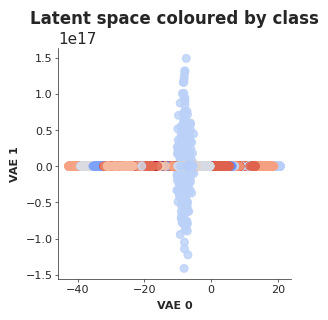

In [ ]:
import seaborn as sns
vis_df = pd.DataFrame()
vis_df['latent_0'] = encoding[:, 0]
vis_df['latent_1'] = encoding[:, 1]
labels = df.index.values
lut = dict(zip(set(labels), sns.color_palette("coolwarm", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1', colour=row_colors2, title='Latent space coloured by class',
                      xlabel='VAE 0', ylabel='VAE 1')
scatter.plot()

## Print out the accuracy

Here we just get the accuracy of the encoding space when we use it as features for a classifier.

In [ ]:
import pandas as pd
df = pd.read_csv()
vd = Validate(encoding, labels)
#print(vd.predict('rf', 'accuracy')) # 0.3159318976209268 is not bad for a 8 class problem
print(vd.predict('svm', 'balanced_accuracy'))

In [ ]:
print(vd.predict('svm', 'balanced_accuracy'))

NameError: name 'vd' is not defined

In [ ]:
protein_df

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Organism (ID),Sequence,Mass,...,Sequence similarities,AlphaFoldDB,PDB,ChEMBL,BindingDB,BRENDA,uid,encodings,Residue,Embedding
0,A0A009IHW8,reviewed,ABTIR_ACIB9,2' cyclic ADP-D-ribose synthase AbTIR (2'cADPR...,J512_3302,Acinetobacter baumannii (strain 1295743),269,1310613,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,30922,...,NaN,A0A009IHW8;,7UWG;7UXU;8G83;,NaN,NaN,NaN,A0A009IHW8_0,-,208,"[-0.107268006, -0.11821179, -0.21968308, 0.248..."
1,A0A023I7E1,reviewed,ENG1_RHIMI,"Glucan endo-1,3-beta-D-glucosidase 1 (Endo-1,3...",ENG1 LAM81A,Rhizomucor miehei,796,4839,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,89495,...,SIMILARITY: Belongs to the glycosyl hydrolase ...,A0A023I7E1;,4K35;4K3A;5XBZ;5XC2;,NaN,NaN,3.2.1.39;,A0A023I7E1_1,-,500|578|582,"[0.10061617, 0.059128072, -0.73712707, -0.0743..."
2,A0A024SC78,reviewed,CUTI1_HYPJR,Cutinase (EC 3.1.1.74),M419DRAFT_76732,Hypocrea jecorina (strain ATCC 56765 / BCRC 32...,248,1344414,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,25924,...,SIMILARITY: Belongs to the cutinase family. {E...,A0A024SC78;,4PSC;4PSD;4PSE;,NaN,NaN,NaN,A0A024SC78_2,-,164|216|229,"[-0.11575803, -0.19206807, 0.121940635, 0.0324..."
3,A0A024SH76,reviewed,GUX2_HYPJR,"Exoglucanase 2 (EC 3.2.1.91) (1,4-beta-cellobi...",cbh2 M419DRAFT_122470,Hypocrea jecorina (strain ATCC 56765 / BCRC 32...,471,1344414,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,49653,...,SIMILARITY: Belongs to the glycosyl hydrolase ...,A0A024SH76;,NaN,NaN,NaN,NaN,A0A024SH76_3,-,245,"[0.4282168, 0.07357499, 0.056511194, 0.017878,..."
4,A0A044RE18,reviewed,BLI_ONCVO,Endoprotease bli (EC 3.4.21.75) (Blisterase),Bli,Onchocerca volvulus,693,6282,MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...,76800,...,SIMILARITY: Belongs to the peptidase S8 family...,A0A044RE18;,NaN,NaN,NaN,NaN,A0A044RE18_4,-,201|240|414,"[-0.15667133, -0.3604668, -0.3056898, 0.405365..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100715,Q9KCY0,reviewed,Y1439_HALH5,Putative phosphoesterase BH1439 (EC 3.1.-.-),BH1439,Halalkalibacterium halodurans (strain ATCC BAA...,171,272558,MNYGVALFPSKPLQDLANSYRMRYDPHYTLIPPHVTLKEPFELEEQ...,20198,...,SIMILARITY: Belongs to the 2H phosphoesterase ...,Q9KCY0;,NaN,NaN,NaN,NaN,Q9KCY0_100716,[[-0.08416431 -0.05606332 -0.11780971 ... 0.1...,34|115,"[-0.20575453, -0.21057677, -0.1273242, 0.21883..."
100716,Q9RC57,reviewed,Y1850_HALH5,Uncharacterized thioester dehydrase BH1850 (EC...,BH1850,Halalkalibacterium halodurans (strain ATCC BAA...,156,272558,MVSVLDKINVTELRPGNMLLQQPPFLFVDRILEFDEETITCSKYLS...,17874,...,SIMILARITY: Belongs to the thioester dehydrata...,Q9RC57;,NaN,NaN,NaN,NaN,Q9RC57_100717,[[-0.08416431 -0.05606332 -0.11780971 ... 0.1...,55,"[-0.05448198, 0.42023173, -0.12497384, 0.11902..."
100717,Q9SND9,reviewed,Y3028_ARATH,Uncharacterized acetyltransferase At3g50280 (E...,At3g50280 F11C1.120,Arabidopsis thaliana (Mouse-ear cress),443,3702,MADVTFISSSIVRPQIINQEGREKIHLTPFDLNLLYVDYTQRGLLF...,49960,...,SIMILARITY: Belongs to the plant acyltransfera...,Q9SND9;,NaN,NaN,NaN,NaN,Q9SND9_100718,[[ 0.01190361 0.05964554 -0.11077195 ... 0.1...,164|386,"[-0.09836839, -0.12362206, -0.21005388, -0.101..."
100718,Q9WYM9,reviewed,Y398_THEMA,Uncharacterized protein TM_0398,TM_0398,Thermotoga maritima (strain ATCC 43589 / DSM 3...,377,243274,MSYDLPRLTPDKDFKVPSACGVSGIMNTSGKRFSGSVIVESMALMR...,42651,...,NaN,Q9WYM9;,NaN,NaN,NaN,NaN,Q9WYM9_100719,-,20,"[-0.16742367, 0.06977822, -0.00035058925, -0.3..."


In [ ]:
with open('/disk1/ariane/vscode/llms/notebooks/data_processing/protein_embeddings_map_big.pkl', 'rb') as file:
    protein_df = pickle.load(file)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('/disk1/ariane/vscode/CARE/pretrained/splits/task1/protein_train.csv', index_col=0)
df.set_index('Entry', inplace=True)
protein_df.set_index('Entry', inplace=True)
df = df.join(protein_df, how='left', lsuffix='_CARE', rsuffix='_Protein')
df


,Entry Name_CARE,Sequence_CARE,EC number_CARE,Length_CARE,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,...,PDB,ChEMBL,BindingDB,BRENDA,uid,encodings,Residue,Embedding Nearby,Embedding Random,Embedding Active
Entry,,,,,,,,,,,,,,,,,,,,,
A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A0A009IHW8,A1AY86,A0A009IHW8,A0A009IHW8,3.2.2,...,7UWG;7UXU;8G83;,NaN,NaN,NaN,A0A009IHW8_0,-,208,"[[-0.1558635, -0.096210584, -0.28699037, 0.253...","[[-0.007904043, -0.52470237, 0.11371861, 0.220...","[[-0.107268006, -0.11821179, -0.21968308, 0.24..."
A0A023GS28,DIOX1_RUTGR,MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKP...,1.14.11.61,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A023GS28,DIOX1_RUTGR,MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKP...,1.14.11.62,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A023GS29,DIOX2_RUTGR,MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPF...,1.14.11.61,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A023GS29,DIOX2_RUTGR,MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPF...,1.14.11.62,369,1.14.11.61; 1.14.11.62,Q9LHN8,Q9ZWQ9,A0A023GS28,A0A023GS28,1.14.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2JE85,C7BL2_TANPA,MEPFTIFSLVVASLVFFACWALVAPNTSKNLPPGPPKLPIIGNIHQ...,1.14.14.150,496,1.14.14.150,A0A2H4DGV8,I1TEM1,F8S1I0,X2JE85,1.14.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2JI34,GAO_TANPA,MALSLTTSIALATILFFVYKFATRSKSTKNSLPEPWRLPIIGHMHH...,1.14.14.95,488,1.14.14.95,Q1PS23,I1TEM1,Q1PS23,X2JI34,1.14.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2L4E2,OXLA_BOTPC,SLLFLAAVGSCADDRNPLEECFRETDYEEFLEIAKNGLSTTSNPKR...,1.4.3.2,498,1.4.3.2,A0A2U8QPE6,O34363,A8QL52,P0CC17,1.4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(subset='Embedding Nearby')
df

,Entry Name_CARE,Sequence_CARE,EC number_CARE,Length_CARE,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,...,PDB,ChEMBL,BindingDB,BRENDA,uid,encodings,Residue,Embedding Nearby,Embedding Random,Embedding Active
Entry,,,,,,,,,,,,,,,,,,,,,
A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A0A009IHW8,A1AY86,A0A009IHW8,A0A009IHW8,3.2.2,...,7UWG;7UXU;8G83;,NaN,NaN,NaN,A0A009IHW8_0,-,208,"[[-0.1558635, -0.096210584, -0.28699037, 0.253...","[[-0.007904043, -0.52470237, 0.11371861, 0.220...","[[-0.107268006, -0.11821179, -0.21968308, 0.24..."
A0A023VXA2,GUN_MAREN,MPRMLAASAAIIATTLAPLSAQAAGCEMTLHGINLSGAEFGQPGDP...,3.2.1.4,349,3.2.1.4,A0A023VXA2,A1DME8,A0A023VXA2,A0A023VXA2,3.2.1,...,NaN,NaN,NaN,NaN,A0A023VXA2_25370,-,158|270,"[[-0.1148703, -0.35033482, -0.06774102, 0.2648...","[[0.09469972, -0.15728319, -0.099105895, -0.24...","[[-0.030708596, -0.71593106, -0.1931769, 0.346..."
A0A024RBG1,NUD4B_HUMAN,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...,3.6.1.52,181,3.6.1.52,P0C027,P0C027,P0C027,Q99MY2,3.6.1,...,NaN,NaN,NaN,NaN,A0A024RBG1_11416,-,69,"[[0.19332035, -0.18823668, -0.121116415, 0.414...","[[-0.15008017, -0.17742576, -0.06679303, 0.238...","[[-0.17121066, -0.52765626, -0.29541758, 0.243..."
A0A024RXP8,GUX1_HYPJR,MYRKLAVISAFLATARAQSACTLQSETHPPLTWQKCSSGGTCTQQT...,3.2.1.91,514,3.2.1.91,Q00328,Q00548,Q9P8P3,A0A024RXP8,3.2.1,...,NaN,NaN,NaN,3.2.1.91;,A0A024RXP8_11417,-,229|234,"[[0.105434634, -0.47354117, -0.017586606, 0.06...","[[0.13726412, -0.17137875, -0.22098577, 0.1057...","[[0.15519664, -0.27910328, 0.2565076, 0.118618..."
A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,3.1.1.74,A8QPD8,A8QPD8,A8QPD8,A0A024SC78,3.1.1,...,4PSC;4PSD;4PSE;,NaN,NaN,NaN,A0A024SC78_2,-,164|216|229,"[[-0.28441128, -0.106574036, 0.09975157, 0.072...","[[0.0836327, 0.19475254, -0.046427544, -0.2071...","[[-0.11575803, -0.19206807, 0.121940635, 0.032..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W8CV45,TRPDH_NOSPU,MLLFETVREMGHEQVLFCHSKNPEIKAIIAIHDTTLGPAMGATRIL...,1.4.1.19,353,1.4.1.19,B2IXH4,Q59771,B2IXH4,B2IXH4,1.4.1,...,5B37;,NaN,NaN,1.4.1.19;,W8CV45_11412,-,80,"[[-0.2335814, -0.17349918, 0.04378458, 0.20190...","[[0.080235474, -0.05508641, -0.09391224, 0.074...","[[-0.11869993, 0.090804644, -0.08621589, -0.23..."
W8P8Q3,SALK6_KALTU,MKTFNLPLLVALFYLFVSVARSQGPIDITKFGAKPNADATSALLAA...,3.2.1.67,401,3.2.1.67,P49063,P48979,W8P8Q3,W8P8Q3,3.2.1,...,NaN,NaN,NaN,NaN,W8P8Q3_84437,-,219|242,"[[-0.100614704, -0.36435547, -0.090042934, 0.4...","[[-0.0038958949, -0.24216364, 0.009184207, 0.0...","[[-0.14331429, -0.43891388, -0.09523739, 0.265..."
W8QRE4,XYL5_PHACH,MAYLKVSGTKIVDKDGNEVILRGAGLGGWMNMENFITGYPGCEFQI...,3.2.1.37,476,3.2.1.37,W8QRE4,W8QRE4,W8QRE4,W8QRE4,3.2.1,...,NaN,NaN,NaN,3.2.1.37;,W8QRE4_84438,-,188|292,"[[-0.17940144, -0.39632633, 0.06976819, 0.1189...","[[-0.11290616, -0.43772182, 0.035263702, 0.134...","[[-0.31609756, -0.40390113, -0.1951777, 0.2745..."


In [ ]:
df = df.drop_duplicates(subset='Entry Name_CARE')

In [ ]:
# Build the datasets 

,Entry Name_CARE,Sequence_CARE,EC number_CARE,Length_CARE,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,...,PDB,ChEMBL,BindingDB,BRENDA,uid,encodings,Residue,Embedding Nearby,Embedding Random,Embedding Active
Entry,,,,,,,,,,,,,,,,,,,,,
A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A0A009IHW8,A1AY86,A0A009IHW8,A0A009IHW8,3.2.2,...,7UWG;7UXU;8G83;,NaN,NaN,NaN,A0A009IHW8_0,-,208,"[[-0.1558635, -0.096210584, -0.28699037, 0.253...","[[-0.007904043, -0.52470237, 0.11371861, 0.220...","[[-0.107268006, -0.11821179, -0.21968308, 0.24..."
A0A023VXA2,GUN_MAREN,MPRMLAASAAIIATTLAPLSAQAAGCEMTLHGINLSGAEFGQPGDP...,3.2.1.4,349,3.2.1.4,A0A023VXA2,A1DME8,A0A023VXA2,A0A023VXA2,3.2.1,...,NaN,NaN,NaN,NaN,A0A023VXA2_25370,-,158|270,"[[-0.1148703, -0.35033482, -0.06774102, 0.2648...","[[0.09469972, -0.15728319, -0.099105895, -0.24...","[[-0.030708596, -0.71593106, -0.1931769, 0.346..."
A0A024RBG1,NUD4B_HUMAN,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...,3.6.1.52,181,3.6.1.52,P0C027,P0C027,P0C027,Q99MY2,3.6.1,...,NaN,NaN,NaN,NaN,A0A024RBG1_11416,-,69,"[[0.19332035, -0.18823668, -0.121116415, 0.414...","[[-0.15008017, -0.17742576, -0.06679303, 0.238...","[[-0.17121066, -0.52765626, -0.29541758, 0.243..."
A0A024RXP8,GUX1_HYPJR,MYRKLAVISAFLATARAQSACTLQSETHPPLTWQKCSSGGTCTQQT...,3.2.1.91,514,3.2.1.91,Q00328,Q00548,Q9P8P3,A0A024RXP8,3.2.1,...,NaN,NaN,NaN,3.2.1.91;,A0A024RXP8_11417,-,229|234,"[[0.105434634, -0.47354117, -0.017586606, 0.06...","[[0.13726412, -0.17137875, -0.22098577, 0.1057...","[[0.15519664, -0.27910328, 0.2565076, 0.118618..."
A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,3.1.1.74,A8QPD8,A8QPD8,A8QPD8,A0A024SC78,3.1.1,...,4PSC;4PSD;4PSE;,NaN,NaN,NaN,A0A024SC78_2,-,164|216|229,"[[-0.28441128, -0.106574036, 0.09975157, 0.072...","[[0.0836327, 0.19475254, -0.046427544, -0.2071...","[[-0.11575803, -0.19206807, 0.121940635, 0.032..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W8CV45,TRPDH_NOSPU,MLLFETVREMGHEQVLFCHSKNPEIKAIIAIHDTTLGPAMGATRIL...,1.4.1.19,353,1.4.1.19,B2IXH4,Q59771,B2IXH4,B2IXH4,1.4.1,...,5B37;,NaN,NaN,1.4.1.19;,W8CV45_11412,-,80,"[[-0.2335814, -0.17349918, 0.04378458, 0.20190...","[[0.080235474, -0.05508641, -0.09391224, 0.074...","[[-0.11869993, 0.090804644, -0.08621589, -0.23..."
W8P8Q3,SALK6_KALTU,MKTFNLPLLVALFYLFVSVARSQGPIDITKFGAKPNADATSALLAA...,3.2.1.67,401,3.2.1.67,P49063,P48979,W8P8Q3,W8P8Q3,3.2.1,...,NaN,NaN,NaN,NaN,W8P8Q3_84437,-,219|242,"[[-0.100614704, -0.36435547, -0.090042934, 0.4...","[[-0.0038958949, -0.24216364, 0.009184207, 0.0...","[[-0.14331429, -0.43891388, -0.09523739, 0.265..."
W8QRE4,XYL5_PHACH,MAYLKVSGTKIVDKDGNEVILRGAGLGGWMNMENFITGYPGCEFQI...,3.2.1.37,476,3.2.1.37,W8QRE4,W8QRE4,W8QRE4,W8QRE4,3.2.1,...,NaN,NaN,NaN,3.2.1.37;,W8QRE4_84438,-,188|292,"[[-0.17940144, -0.39632633, 0.06976819, 0.1189...","[[-0.11290616, -0.43772182, 0.035263702, 0.134...","[[-0.31609756, -0.40390113, -0.1951777, 0.2745..."


In [ ]:
label = '50-70'

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create a k-Nearest Neighbors classifier
k = 1  # Number of neighbors
# Get the train dataset from our CARE program
position_label = 'Embedding Active'
X = np.array([np.asarray(x[0]).astype(np.float32) for x in df[position_label].values])
y = df['EC number_CARE'].values
knn_ = KNeighborsClassifier(n_neighbors=k)
# Train the classifier
knn.fit(X, y)
# Make predictions on the test set
# Now test and get the accuracy 
test_df = pd.read_csv(f'/disk1/ariane/vscode/CARE/pretrained/splits/task1/{label}_protein_test.csv')
test_df.set_index('Entry', inplace=True)
print(len(test_df))
test_df = test_df.join(protein_df, how='left', lsuffix='_CARE', rsuffix='_Protein')
test_df = test_df.drop_duplicates(subset='Entry Name_CARE')
print(len(test_df))
test_df = test_df.dropna(subset=position_label)
print(len(test_df))
X_test = np.array([np.asarray(x[0]).astype(np.float32) for x in test_df[position_label].values])
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_test = test_df['EC number_CARE'].values
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, df['EC number_CARE'].values)

204
204
73
Accuracy: 0.9041095890410958


In [ ]:
position_label = 'Embedding Random'
X = np.array([np.asarray(x[:1]).astype(np.float32).flatten() for x in df[position_label].values])
y = df['EC number_CARE'].values
knn = KNeighborsClassifier(n_neighbors=k)
# Train the classifier
knn.fit(X, y)
# Make predictions on the test set
# Now test and get the accuracy 
test_df = pd.read_csv(f'/disk1/ariane/vscode/CARE/pretrained/splits/task1/{label}_protein_test.csv')
test_df.set_index('Entry', inplace=True)
print(len(test_df))
test_df = test_df.join(protein_df, how='left', lsuffix='_CARE', rsuffix='_Protein')
test_df = test_df.drop_duplicates(subset='Entry Name_CARE')
print(len(test_df))
test_df = test_df.dropna(subset=position_label)
print(len(test_df))
X_test = np.array([np.asarray(x[:1]).astype(np.float32).flatten() for x in test_df[position_label].values])
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_test = test_df['EC number_CARE'].values
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, df['EC number_CARE'].values)

204
204
73
Accuracy: 0.2602739726027397


In [ ]:
position_label = 'Embedding Nearby'
X = np.array([np.asarray(x[0:2]).astype(np.float32).flatten() for x in df[position_label].values])
y = df['EC number_CARE'].values
knn = KNeighborsClassifier(n_neighbors=k)
# Train the classifier
knn.fit(X, y)
# Make predictions on the test set
# Now test and get the accuracy 
test_df = pd.read_csv(f'/disk1/ariane/vscode/CARE/pretrained/splits/task1/{label}_protein_test.csv')
test_df.set_index('Entry', inplace=True)
print(len(test_df))
test_df = test_df.join(protein_df, how='left', lsuffix='_CARE', rsuffix='_Protein')
test_df = test_df.drop_duplicates(subset='Entry Name_CARE')
print(len(test_df))
test_df = test_df.dropna(subset=position_label)
print(len(test_df))
X_test = np.array([np.asarray(x[0:2]).astype(np.float32).flatten() for x in test_df[position_label].values])
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_test = test_df['EC number_CARE'].values
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, df['EC number_CARE'].values)

204
204
73
Accuracy: 0.9041095890410958
